In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('data/clean_data.csv')



In [62]:
print(df.shape)

(2565, 19)


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job_id             2565 non-null   int64  
 1   Job Title          2565 non-null   object 
 2   Rating             2565 non-null   float64
 3   Company_id         2565 non-null   int64  
 4   Company Name       2565 non-null   object 
 5   Size               2565 non-null   object 
 6   Founded            2565 non-null   float64
 7   Type of ownership  2565 non-null   object 
 8   Industry           2565 non-null   object 
 9   Sector             2565 non-null   object 
 10  Revenue            2565 non-null   object 
 11  Easy Apply         2565 non-null   float64
 12  Min_Salary         2565 non-null   float64
 13  Max_Salary         2565 non-null   float64
 14  Avg_Salary         2565 non-null   float64
 15  State_id           2565 non-null   int64  
 16  City               2565 

In [64]:
print(df.head())

   Job_id                                         Job Title  Rating  \
0       0  Business Analyst - Clinical & Logistics Platform     3.9   
1       2                                      Data Analyst     3.6   
2       3   Information Security Analyst, Incident Response     3.6   
3       4                     Analyst - FP&A Global Revenue     3.4   
4       6                     Investment Analyst - Graduate     3.8   

   Company_id              Company Name                   Size  Founded  \
0           0  Memorial Sloan-Kettering       10000+ employees   1884.0   
1           2                   Asembia  501 to 1000 employees   2004.0   
2           3                        BD       10000+ employees   1897.0   
3           4           Rubicon Project   201 to 500 employees   2007.0   
4           6                  Swiss Re       10000+ employees   1863.0   

        Type of ownership                            Industry  \
0  Nonprofit Organization    Health Care Services & Hospi

In [65]:
print(df.isnull().sum())

Job_id               0
Job Title            0
Rating               0
Company_id           0
Company Name         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Easy Apply           0
Min_Salary           0
Max_Salary           0
Avg_Salary           0
State_id             0
City                 0
State                0
Headquarter          0
dtype: int64


In [46]:
dummies=pd.get_dummies(df[['Job Title', 'Company Name','Sector']])


In [66]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2565 entries, 0 to 2564
Columns: 2734 entries, Job Title_(59b) Configuration Management Analyst to Sector_Transportation & Logistics
dtypes: uint8(2734)
memory usage: 6.7 MB


In [67]:
dummies.head(5)

,Job Title_(59b) Configuration Management Analyst,Job Title_2021 Global Finance & Business Management Analyst Program - Summer Analyst Opportunity,Job Title_ABDC Business Analyst,Job Title_ACH Analyst,Job Title_AEM Business Analyst,Job Title_AI/ML Products Business Analyst,Job Title_AIG Retirement Services Plan Administration Analyst I,"Job Title_ALPHA - Business Analyst, AVP",Job Title_AML Business Analyst / Project Manager,Job Title_AML Compliance Analyst,...,Sector_Manufacturing,Sector_Media,Sector_Mining & Metals,Sector_Non-Profit,"Sector_Oil, Gas, Energy & Utilities",Sector_Real Estate,"Sector_Restaurants, Bars & Food Services",Sector_Retail,Sector_Telecommunications,Sector_Transportation & Logistics
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y=df['Avg_Salary']

In [51]:
xnumerical=df.drop(['Company Name','Job Title','Sector', 'Avg_Salary'], axis =1)
listnumerical=xnumerical.columns
print(listnumerical)

Index(['Job_id', 'Rating', 'Company_id', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Revenue', 'Easy Apply', 'Min_Salary',
       'Max_Salary', 'State_id', 'City', 'State', 'Headquarter'],
      dtype='object')


In [58]:
#Creating features
x=pd.concat([xnumerical,dummies[['Sector_Manufacturing','Sector_Media','Sector_Restaurants, Bars & Food Services']]], axis =1)
x.info

<bound method DataFrame.info of       Job_id  Rating  Company_id                    Size  Founded  \
0          0     3.9           0        10000+ employees   1884.0   
1          2     3.6           2   501 to 1000 employees   2004.0   
2          3     3.6           3        10000+ employees   1897.0   
3          4     3.4           4    201 to 500 employees   2007.0   
4          6     3.8           6        10000+ employees   1863.0   
...      ...     ...         ...                     ...      ...   
2560    3685     3.3        3685  1001 to 5000 employees   1997.0   
2561    3686     5.0        3686     51 to 200 employees   2008.0   
2562    3687     3.1        3687   501 to 1000 employees   2005.0   
2563    3688     5.0        3688     51 to 200 employees   2008.0   
2564    3690     3.5        3690  1001 to 5000 employees   1968.0   

           Type of ownership                                 Industry  \
0     Nonprofit Organization         Health Care Services & Hospit

In [59]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest,=train_test_split(x,y, test_size=0.3, random_state=10)
xtrain.head()

,Job_id,Rating,Company_id,Size,Founded,Type of ownership,Industry,Revenue,Easy Apply,Min_Salary,Max_Salary,State_id,City,State,Headquarter,Sector_Manufacturing,Sector_Media,"Sector_Restaurants, Bars & Food Services"
828,1252,2.4,1252,51 to 200 employees,2005.0,Company - Private,Computer Hardware & Software,25 50,0.0,45000.0,53000.0,1252,Houston,TX,GA,0,0,0
2282,3278,3.7,3278,10000+ employees,2004.0,Company - Public,Enterprise Software & Network Solutions,2 5,0.0,69000.0,127000.0,3278,Santa Clara,CA,CA,0,0,0
123,191,3.5,191,1001 to 5000 employees,1994.0,Company - Private,Computer Hardware & Software,2 5,0.0,59000.0,85000.0,191,Secaucus,NJ,NJ,0,0,0
2356,3385,4.0,3385,201 to 500 employees,1998.0,Company - Private,IT Services,25 50,0.0,41000.0,79000.0,3385,Austin,TX,VA,0,0,0
495,770,4.1,770,5001 to 10000 employees,1868.0,Company - Public,Consumer Products Manufacturing,5 10,0.0,69000.0,97000.0,770,Chicago,IL,OH,1,0,0


In [78]:
from sklearn.preprocessing import StandardScaler
xnumerical=df.drop(['Company Name','Job Title','Sector', 'Avg_Salary'], axis =1)
listnumerical=xnumerical.columns

scaler=StandardScaler().fit(xtrain[listnumerical])
xtrain[listnumerical]=scaler.transform(xtrain[listnumerical])
xtest[listnumerical]=scaler.transform(xtest[listnumerical])
xtrain 

KeyError: "['Rating', 'Size', 'Type of ownership', 'Industry', 'Revenue', 'City', 'State', 'Headquarter'] not in index"

<bound method ElasticNet.fit of Lasso()>
Mean Squared Error: 1.160053845200578


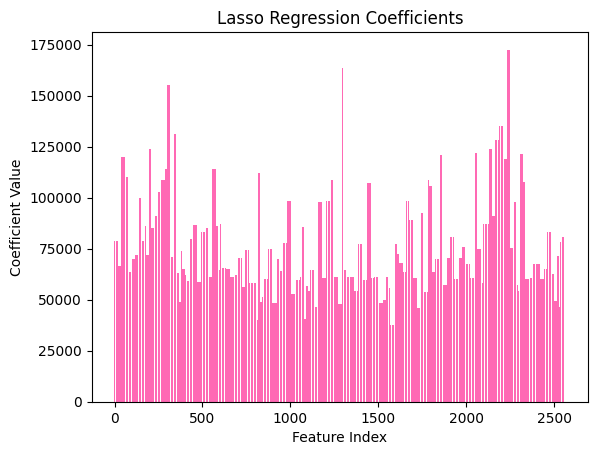

In [77]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

x = df.drop('Rating', axis=1)  
y = df['Avg_Salary']  

#Encoding
Xencoded = pd.get_dummies(x)

# Split the data into training and test sets
xtrain, xtest, ytrain, ytest = train_test_split(Xencoded, y, test_size=0.2, random_state=42)

# Creating a Lasso regression model
lasso = Lasso(alpha=1.0) 

# Fit the model to the training data
lasso.fit(xtrain, ytrain)

# Predict on the test set
ypred = lasso.predict(xtest)
print(lasso.fit)

#Calculate the mean squared error
mse = mean_squared_error(ytest, ypred)
print("Mean Squared Error:", mse)

coefficients = lasso.coef_

# Plot the coefficients
plt.bar(range(len(x)), y, color= '#FF69B4')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression Coefficients')
plt.show()
